#**IMPORTING BASIC LIBRARIES**

 (REST IMPORTED AS REQUIRED)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**MOUNTING DIRVE**

this step is optional only if using on google collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**READING CSV**

In [309]:
dff = pd.read_csv('/content/drive/MyDrive/pandas data/cumulative.csv')
pd.set_option('display.max_columns', None)
# we used this option to see all cols

#**INITIAL ANALYSIS OF DATA**

In [ ]:
dff.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
dff.shape

(9564, 50)

we can drop koi_koi_teq_err1 and koi_teq_err2 as completly empty


In [ ]:
dff=dff.drop(['koi_teq_err2','koi_teq_err1'],axis=1)

keeping only those rows which have confirmed and false positive

In [ ]:
dff[dff['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,9557,8258160,K03870.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,q1_q17_dr25_tce,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.

In [ ]:
dff=dff[dff['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

In [ ]:
dff.shape

(7316, 48)

we removed all those rows which have values other than confirmed and false positive

In [ ]:
dff.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          5022
koi_disposition         0
koi_pdisposition        0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_tce_delivname     279
koi_steff             300
koi_steff_err1        397
koi_steff_er

these cols had lots of missing values so deleted

In [ ]:
dff=dff.drop(['kepler_name','rowid'],axis=1)

In [ ]:
categoric =['koi_tce_delivname','koi_pdisposition','koi_disposition','kepler_name','kepoi_name']

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              7316 non-null   int64  
 1   kepoi_name         7316 non-null   object 
 2   koi_disposition    7316 non-null   object 
 3   koi_pdisposition   7316 non-null   object 
 4   koi_score          6257 non-null   float64
 5   koi_fpflag_nt      7316 non-null   int64  
 6   koi_fpflag_ss      7316 non-null   int64  
 7   koi_fpflag_co      7316 non-null   int64  
 8   koi_fpflag_ec      7316 non-null   int64  
 9   koi_period         7316 non-null   float64
 10  koi_period_err1    6939 non-null   float64
 11  koi_period_err2    6939 non-null   float64
 12  koi_time0bk        7316 non-null   float64
 13  koi_time0bk_err1   6939 non-null   float64
 14  koi_time0bk_err2   6939 non-null   float64
 15  koi_impact         7016 non-null   float64
 16  koi_impact_err1    6939 non-n

#**CHECKING FOR CATEGORICAL DATA**

In [ ]:
dff[['koi_tce_delivname','koi_pdisposition','koi_disposition','kepoi_name']]

,koi_tce_delivname,koi_pdisposition,koi_disposition,kepoi_name
0,q1_q17_dr25_tce,CANDIDATE,CONFIRMED,K00752.01
1,q1_q17_dr25_tce,CANDIDATE,CONFIRMED,K00752.02
2,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K00753.01
3,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K00754.01
4,q1_q17_dr25_tce,CANDIDATE,CONFIRMED,K00755.01
...,...,...,...,...
9556,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K03870.01
9559,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K07984.01
9560,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K07985.01
9562,q1_q17_dr25_tce,FALSE POSITIVE,FALSE POSITIVE,K07987.01


In [ ]:
dff['koi_tce_delivname'].value_counts()

koi_tce_delivname
q1_q17_dr25_tce    6257
q1_q16_tce          561
q1_q17_dr24_tce     219
Name: count, dtype: int64

clearly we dont need koi_tce_delivname

In [ ]:
dff=dff.drop(['koi_tce_delivname'],axis=1)

#**CREATING CATEGORIC LIST**

In [ ]:
categoric =['koi_pdisposition','koi_disposition','kepoi_name']

#**CREATING NUMERIC LIST**

In [ ]:
numerical_df = dff.select_dtypes(include=[int, float])

In [ ]:
numerical_df.isnull().sum()

kepid                   0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_steff             300
koi_steff_err1        397
koi_steff_err2        412
koi_slogg             300
koi_slogg_err1        397
koi_slogg_err2        397
koi_srad              300
koi_srad_err1         397
koi_srad_err

In [ ]:
len(numerical_df.isnull().columns)

42

we will try to fill all these missing numeric  values

koi_kepmag has only one missing value so we will delete that row

In [ ]:
dff[dff['koi_kepmag'].isnull()]

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8639,2438061,K06270.01,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,2.442941,0.000002,-0.000002,132.011468,0.000725,-0.000725,1.164,1.792,-0.133,4.1847,0.031,-0.031,37338.0,193.0,-193.0,48.18,0.0,0.0,1352.0,788.17,0.0,0.0,229.7,1.0,5780.0,NaN,NaN,4.438,NaN,NaN,1.0,NaN,NaN,290.27701,37.79097,NaN


In [ ]:
dff=dff.drop(8639)

In [ ]:
null_counts = numerical_df.isnull().sum()
null_counts

kepid                   0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_steff             300
koi_steff_err1        397
koi_steff_err2        412
koi_slogg             300
koi_slogg_err1        397
koi_slogg_err2        397
koi_srad              300
koi_srad_err1         397
koi_srad_err

In [ ]:
len(null_counts.index)

42

we have 42 numerical cols we are trying to find how many of them have missing values

In [ ]:
null_counts[null_counts != 0].index

Index(['koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag'],
      dtype='object')

In [ ]:
len(null_counts[null_counts !=0].index)

32

11 cols dont have missing values rest 31 have missing values in them

In [ ]:
numerical_df

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,8258160,0.000,0,1,0,0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,10031643,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,10090151,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,10147276,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


#**ANALYSIS OF NUMERICAL COLS**

In [ ]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              7316 non-null   int64  
 1   koi_score          6257 non-null   float64
 2   koi_fpflag_nt      7316 non-null   int64  
 3   koi_fpflag_ss      7316 non-null   int64  
 4   koi_fpflag_co      7316 non-null   int64  
 5   koi_fpflag_ec      7316 non-null   int64  
 6   koi_period         7316 non-null   float64
 7   koi_period_err1    6939 non-null   float64
 8   koi_period_err2    6939 non-null   float64
 9   koi_time0bk        7316 non-null   float64
 10  koi_time0bk_err1   6939 non-null   float64
 11  koi_time0bk_err2   6939 non-null   float64
 12  koi_impact         7016 non-null   float64
 13  koi_impact_err1    6939 non-null   float64
 14  koi_impact_err2    6939 non-null   float64
 15  koi_duration       7316 non-null   float64
 16  koi_duration_err1  6939 non-n

#**FILLING MISSING VALUES**

method 1 fancy imputer

In [ ]:
# from fancyimpute import IterativeImputer

# mice_imputer = IterativeImputer()

# imputed_data = mice_imputer.fit_transform(numerical_df)


method 2 iterative imputer

In [ ]:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer

# mice_imputer = IterativeImputer(max_iter=50, tol=1e-3, random_state=0)

# # Fit and transform the data
# imputed_data_mice = mice_imputer.fit_transform(numerical_df)

# # Converting back to DataFrame
# imputed_df_mice = pd.DataFrame(imputed_data_mice, columns=numerical_df.columns)

#**WE USING KNN IMPUTER AS IT WOULD GIVE US THE BEST RESULTS**

WE USING KNN IMPUTER AS IT WOULD GIVE US THE BEST RESULTS

We fill missing values by predicting them from the nearest or most similar col

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputed_data = knn_imputer.fit_transform(numerical_df)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_df.columns)
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              7316 non-null   float64
 1   koi_score          7316 non-null   float64
 2   koi_fpflag_nt      7316 non-null   float64
 3   koi_fpflag_ss      7316 non-null   float64
 4   koi_fpflag_co      7316 non-null   float64
 5   koi_fpflag_ec      7316 non-null   float64
 6   koi_period         7316 non-null   float64
 7   koi_period_err1    7316 non-null   float64
 8   koi_period_err2    7316 non-null   float64
 9   koi_time0bk        7316 non-null   float64
 10  koi_time0bk_err1   7316 non-null   float64
 11  koi_time0bk_err2   7316 non-null   float64
 12  koi_impact         7316 non-null   float64
 13  koi_impact_err1    7316 non-null   float64
 14  koi_impact_err2    7316 non-null   float64
 15  koi_duration       7316 non-null   float64
 16  koi_duration_err1  7316 

no more missing values

#**ANALYSIS OF IMPUTED DATAFRAME**

In [ ]:
imputed_df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7.316000e+03,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7.316000e+03,7.316000e+03,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,7.659114e+06,0.373869,0.246036,0.298387,0.254784,0.156916,58.816738,2.129372e-03,-2.129372e-03,164.877955,0.008888,-0.008888,0.794013,2.075566,-0.323506,5.865646,0.320049,-0.320049,3.071217e+04,157.409396,-157.409396,131.049695,21.378882,-42.949793,1149.212903,8.370396e+03,4.163678e+03,-4.200414e+03,327.682329,1.229880,5728.968945,146.437507,-165.146309,4.303471,0.122885,-0.143013,1.773054,0.371773,-0.413789,292.143301,43.767705,14.242297
std,2.655142e+06,0.447804,0.430729,0.457582,0.435770,0.363747,121.082398,8.339644e-03,8.339644e-03,65.646366,0.021101,0.021101,3.599629,9.449070,1.191224,6.965178,0.649846,0.649846,9.152277e+04,4698.399236,4698.399236,3467.870526,434.126316,1348.143298,886.728703,1.574177e+05,5.719397e+04,7.462652e+04,877.087622,0.641264,813.735889,46.476446,74.182630,0.437751,0.131738,0.081841,6.088174,0.990869,2.204215,4.744932,3.599717,1.407001
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,1.100000e-08,-1.725000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-37.530000,0.104600,0.000000,-20.200000,8.000000e-01,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.362422e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.007000,0.116000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.521112e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.237412,3.808750e-06,-2.107000e-04,132.588305,0.000947,-0.009030,0.237075,0.040000,-0.424000,2.527525,0.039630,-0.312000,1.911750e+02,9.500000,-55.300000,1.560000,0.260000,-2.990000,569.000000,2.533750e+01,1.132250e+01,-4.276775e+02,15.100000,1.000000,5330.000000,111.000000,-198.000000,4.204000,0.045000,-0.195000,0.834600,0.136950,-0.273000,288.839360,40.718053,13.407500
50%,7.848890e+06,0.001000,0.000000,0.000000,0.000000,0.000000,8.507657,2.415500e-05,-2.415500e-05,136.765693,0.003280,-0.003280,0.580200,0.189000,-0.187000,3.904750,0.117000,-0.117000,5.355500e+02,20.900000,-20.900000,2.800000,0.630000,-0.380000,932.000000,1.894050e+02,9.766000e+01,-5.462000e+01,32.700000,1.000000,5779.000000,157.000000,-163.000000,4.435000,0.072000,-0.135000,1.001000,0.255600,-0.116000,292.306975,43.596432,14.483500
75%,9.851644e+06,0.989000,0.000000,1.000000,1.000000,0.000000,36.184630,2.107000e-04,-3.808750e-06,170.882535,0.009030,-0.000947,0.911000,0.386000,-0.042000,6.432175,0.312000,-0.039630,3.902700e+03,55.300000,-9.500000,25.852500,4.872500,-0.150000,1490.250000,1.269872e+03,8.249650e+02,-6.420000e+00,142.085000,1.000000,6122.000000,175.000000,-117.150000,4.540000,0.153000,-0.090000,1.383250,0.366000,-0.071000,295.931460,46.692538,15.302500
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.725000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.61

the above is the numerical distribution of the data

In [ ]:
imputed_df.corr()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
kepid,1.000000,0.127626,-0.034334,-0.052950,-0.111761,-0.046792,0.012489,0.009881,-0.009881,-0.000578,-0.014819,0.014819,-0.001602,-0.044083,-0.005015,-0.028156,-0.020655,0.020655,-0.018326,-0.020576,0.020576,0.005204,0.006424,-0.005658,-0.058898,-0.009850,-0.009817,0.009282,0.004074,0.020139,-0.024225,-0.012185,0.008901,0.055060,-0.021879,-0.018045,-0.027207,-0.030065,0.022180,0.005400,0.993661,0.016885
koi_score,0.127626,1.000000,-0.180508,-0.519678,-0.447251,-0.348539,0.022444,0.010104,-0.010104,0.041791,-0.026136,0.026136,-0.024157,-0.145014,-0.037090,-0.119230,-0.058164,0.058164,-0.264784,-0.020233,0.020233,0.003895,0.002196,-0.003509,-0.324707,-0.041791,-0.056204,0.044511,-0.234186,0.231782,-0.197114,-0.396238,0.346666,0.153443,-0.176867,0.168209,-0.081504,-0.111904,0.083664,-0.213312,0.127164,0.029478
koi_fpflag_nt,-0.034334,-0.180508,1.000000,-0.360742,-0.100954,-0.029186,0.503624,0.385550,-0.385550,0.319150,0.335652,-0.335652,0.048526,-0.030472,-0.054082,0.265886,0.432231,-0.432231,-0.081808,0.021379,-0.021379,0.041232,0.044049,-0.039145,-0.055713,-0.000094,0.020436,-0.004541,-0.116510,0.054847,0.106280,0.137186,-0.151459,-0.126530,0.065251,-0.202478,0.034226,0.086069,-0.041737,-0.001905,-0.039147,-0.112201
koi_fpflag_ss,-0.052950,-0.519678,-0.360742,1.000000,0.078709,0.044723,-0.182229,-0.151358,0.151358,-0.134395,-0.184800,0.184800,0.035013,0.160869,0.056963,-0.016238,-0.207131,0.207131,0.396218,0.003106,-0.003106,-0.003906,0.000675,0.006693,0.159399,0.028244,0.020220,-0.026053,0.406409,-0.204351,0.100159,0.214419,-0.170747,-0.046384,0.120814,-0.055455,0.033118,0.031953,-0.028826,0.092310,-0.051522,0.036956
koi_fpflag_co,-0.111761,-0.447251,-0.100954,0.078709,1.000000,0.498929,-0.186387,-0.098954,0.098954,-0.135909,-0.010019,0.010019,0.002404,0.115645,-0.007354,-0.070770,0.003763,-0.003763,-0.173634,-0.014953,0.014953,-0.016567,-0.020667,0.016240,0.243007,0.021662,0.017493,-0.019018,-0.179813,-0.134383,0.002886,0.146864,-0.102161,-0.005053,-0.027339,-0.058678,0.040077,0.027485,-0.027104,0.176092,-0.109730,0.084556
koi_fpflag_ec,-0.046792,-0.348539,-0.029186,0.044723,0.498929,1.000000,-0.159116,-0.091925,0.091925,-0.113622,0.024744,-0.024744,-0.012556,0.032928,0.008826,0.005439,0.034977,-0.034977,-0.121669,-0.006965,0.006965,-0.013840,-0.016726,0.012186,0.209345,0.033225,0.039732,-0.032576,-0.126564,-0.104380,0.000513,0.111350,-0.069293,0.009578,-0.014222,-0.042417,0.018802,0.023294,-0.007010,0.074585,-0.047863,0.051064
koi_period,0.012489,0.022444,0.503624,-0.182229,-0.186387,-0.159116,1.000000,0.605344,-0.605344,0.651326,0.302921,-0.302921,0.065862,0.010772,-0.074942,0.302982,0.404848,-0.404848,-0.072625,0.038872,-0.038872,0.068667,0.050442,-0.065996,-0.387014,-0.023557,-0.032259,0.024715,-0.077952,0.011262,0.016210,0.026765,-0.026415,-0.038241,-0.014166,-0.182136,0.004364,0.027470,-0.000569,-0.065153,0.010905,-0.038562
koi_period_err1,0.009881,0.010104,0.385550,-0.151358,-0.098954,-0.091925,0.605344,1.000000,-1.000000,0.403059,0.590217,-0.590217,0.027702,-0.011139,-0.032952,0.228537,0.539181,-0.539181,-0.078024,0.007763,-0.007763,0.025611,0.018224,-0.024993,-0.229869,-0.013177,-0.017968,0.013877,-0.088448,0.048192,0.028826,0.070869,-0.047532,0.000051,0.000264,-0.193436,-0.006613,0.021908,0.005092,-0.041924,0.008560,-0.026847
koi_period_err2,-0.009881,-0.010104,-0.385550,0.151358,0.098954,0.091925,-0.605344,-1.000000,1.000000,-0.403059,-0.590217,0.590217,-0.027702,0.011139,0.03295

the above is a  correlation between all the numeric values , excluding categorical and target col

clearly we can see very few have correlation >0.5 or <-0.5 , and suprisingly kepid and dec have a corr of 0.99

In [ ]:
dff.select_dtypes(include=['number']).columns

Index(['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

#**MISSING CATEGORICAL COLS**

In [ ]:
categoric =['koi_pdisposition','koi_disposition','kepoi_name']
categoric_df=dff[categoric]
categoric_df

,koi_pdisposition,koi_disposition,kepoi_name
0,CANDIDATE,CONFIRMED,K00752.01
1,CANDIDATE,CONFIRMED,K00752.02
2,FALSE POSITIVE,FALSE POSITIVE,K00753.01
3,FALSE POSITIVE,FALSE POSITIVE,K00754.01
4,CANDIDATE,CONFIRMED,K00755.01
...,...,...,...
9556,FALSE POSITIVE,FALSE POSITIVE,K03870.01
9559,FALSE POSITIVE,FALSE POSITIVE,K07984.01
9560,FALSE POSITIVE,FALSE POSITIVE,K07985.01
9562,FALSE POSITIVE,FALSE POSITIVE,K07987.01


In [ ]:
missing_values_count = categoric_df.isnull().sum()
missing_values_count



koi_pdisposition    0
koi_disposition     0
kepoi_name          0
dtype: int64

categorical data has no missing values


**INITIALLLY WE HAD 50 ROWS , WE DELETED 5 SO LEFT WITH 45**

**42 COLS ARE NUMERICAL AND 3 COLS ARE CATEGORICAL**

In [ ]:
imputed_df.columns

Index(['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

#**TRYING TO CONCATENATE CAT AND NUM DATA COLS**

In [ ]:
categoric_df.columns


Index(['koi_pdisposition', 'koi_disposition', 'kepoi_name'], dtype='object')

In [ ]:
imputed_df.shape

(7316, 42)

In [ ]:
categoric_df.shape

(7315, 3)

#**RESET INDEX TO CONCATENATE**

In [ ]:
categoric_df.reset_index(drop=True, inplace=True)
imputed_df.reset_index(drop=True, inplace=True)
#because when we removed rows earlier indexing became irregular on removing rows

In [ ]:
categoric_df

,koi_pdisposition,koi_disposition,kepoi_name
0,CANDIDATE,CONFIRMED,K00752.01
1,CANDIDATE,CONFIRMED,K00752.02
2,FALSE POSITIVE,FALSE POSITIVE,K00753.01
3,FALSE POSITIVE,FALSE POSITIVE,K00754.01
4,CANDIDATE,CONFIRMED,K00755.01
...,...,...,...
7310,FALSE POSITIVE,FALSE POSITIVE,K03870.01
7311,FALSE POSITIVE,FALSE POSITIVE,K07984.01
7312,FALSE POSITIVE,FALSE POSITIVE,K07985.01
7313,FALSE POSITIVE,FALSE POSITIVE,K07987.01


In [ ]:
imputed_df

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
7312,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
7313,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
7314,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


#**COMBINING BOTH NUM AND CAT**

In [ ]:
combined_df = pd.concat([categoric_df, imputed_df], axis=1)

In [ ]:
combined_df

,koi_pdisposition,koi_disposition,kepoi_name,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,CONFIRMED,K00752.01,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,CONFIRMED,K00752.02,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,K00753.01,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,K00754.01,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,CONFIRMED,K00755.01,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,FALSE POSITIVE,FALSE POSITIVE,K07984.01,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
7312,FALSE POSITIVE,FALSE POSITIVE,K07985.01,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
7313,FALSE POSITIVE,FALSE POSITIVE,K07987.01,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
7314,FALSE POSITIVE,FALSE POSITIVE,K07989.01,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


#**EDA UNIVARIANT**

we plotted boxplot and hisplot for all cols for univariant analysis

In [ ]:
# def create_grid_plot(n_cols, plot_func, cols, plot_type='displot'):
#     n_rows = (len(cols) + n_cols - 1) // n_cols
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
#     axes = axes.flatten()

#     for i, col in enumerate(cols):
#         if plot_type == 'displot':
#             sns.histplot(df[col], kde=True, ax=axes[i])
#         elif plot_type == 'boxplot':
#             sns.boxplot(y=df[col], ax=axes[i])
#         axes[i].set_title(f'{plot_func.__name__.capitalize()} of {col}')

#     for j in range(i + 1, len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

# numeric_cols = ['kepid', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
#                 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2',
#                 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
#                 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
#                 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
#                 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
#                 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


# create_grid_plot(4, sns.histplot, numeric_cols, plot_type='displot')

# create_grid_plot(4, sns.boxplot, numeric_cols, plot_type='boxplot')





#this code takes almost 25 mins to run , i have linked outputs below

above is the code to generate box plot and hisplot , it took 25 min so i linked the output below

[Box plot](https://drive.google.com/uc?export=view&id=14Jgkf-yULJ47MSObB1ikSHELrPKbb5fP)


[Hisplot](https://drive.google.com/uc?export=view&id=1arHowGVtXC3GTvISYHuQQgQQdtZPz5wO)

#**OUTLIER DETECTION**

using isolation forest to get a rough idea of outliers

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit the model
clf = IsolationForest(random_state=42)
clf.fit(combined_df[imputed_df.columns])

# Predict outliers
combined_df['outlier'] = clf.predict(combined_df[imputed_df.columns])
outliers_if = pd.DataFrame(combined_df[combined_df['outlier'] == -1])

# Print outliers
print("Outliers detected by Isolation Forest:")
outliers_if


Outliers detected by Isolation Forest:


,koi_pdisposition,koi_disposition,kepoi_name,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier
243,FALSE POSITIVE,FALSE POSITIVE,K00909.01,8256049.0,0.0000,0.0,0.0,1.0,1.0,16.371987,0.000028,-0.000028,172.759260,0.001380,-0.001380,9.3030,65.7500,-6.5940,3.8449,0.0654,-0.0654,4147.6,84.0,-84.0,540.37,39.25,-58.42,438.0,8.71,2.56,-2.57,54.5,1.0,4187.0,125.0,-125.0,4.656,0.056,-0.024,0.592,0.043,-0.064,298.67862,44.175499,15.654,-1
294,FALSE POSITIVE,FALSE POSITIVE,K00970.01,11502218.0,0.0000,0.0,1.0,0.0,0.0,3.988602,0.000008,-0.000008,171.018520,0.001590,-0.001590,0.0600,0.3640,-0.0600,1.7376,0.0588,-0.0588,673.5,21.8,-21.8,34.39,4.71,-10.99,3145.0,23135.72,8030.46,-13457.76,37.1,1.0,4813.0,50.0,-121.0,2.472,0.156,-0.117,13.652,1.869,-4.361,289.09323,49.424484,6.974,-1
299,FALSE POSITIVE,FALSE POSITIVE,K00014.01,7684873.0,0.0000,0.0,1.0,0.0,0.0,2.947377,0.000003,-0.000003,171.522978,0.000883,-0.000883,2.6410,10.9900,-0.7070,2.0911,0.0437,-0.0437,433.2,8.5,-8.5,403.59,85.99,-105.00,2404.0,7903.84,5082.12,-4259.41,62.3,1.0,8090.0,226.0,-340.0,4.002,0.198,-0.132,2.234,0.476,-0.581,292.61194,43.305141,10.470,-1
330,FALSE POSITIVE,FALSE POSITIVE,K00979.01,5648449.0,0.0000,0.0,1.0,0.0,0.0,4.348866,0.000008,-0.000008,262.727680,0.001280,-0.001280,1.1870,7.0120,-0.2530,3.2797,0.0741,-0.0741,625.6,13.3,-13.3,2436.69,497.50,-808.50,6421.0,401588.95,232894.16,-237326.16,56.3,1.0,3598.0,78.0,-78.0,0.650,0.258,-0.211,101.451,20.714,-33.660,298.80411,40.843563,10.680,-1
355,FALSE POSITIVE,FALSE POSITIVE,K01054.01,6032981.0,0.0368,0.0,0.0,0.0,0.0,3.322695,0.000298,-0.000298,134.444000,0.033800,-0.033800,0.4722,0.0095,-0.4661,3.5680,0.8220,-0.8220,78.7,17.2,-17.2,15.33,2.90,-8.17,3859.0,52428.30,25780.62,-42182.54,8.6,1.0,5234.0,70.0,-142.0,2.410,0.255,-0.114,16.959,3.211,-9.038,288.68259,41.307320,11.899,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,FALSE POSITIVE,FALSE POSITIVE,K07980.01,9941425.0,0.0000,0.0,0.0,1.0,0.0,1.075158,0.000009,-0.000009,131.709200,0.006550,-0.006550,0.1570,0.3030,-0.1570,1.2950,0.4290,-0.4290,30.2,5.8,-5.8,20.09,2.65,-4.16,6988.0,565413.02,225128.97,-245918.84,8.0,1.0,4067.0,90.0,-107.0,1.541,0.030,-0.030,38.446,5.067,-7.963,286.83789,46.830837,12.032,-1
7297,FALSE POSITIVE,FALSE POSITIVE,K08197.01,10081899.0,0.0000,1.0,0.0,0.0,0.0,522.646130,0.052850,-0.052850,190.338900,0.076300,-0.076300,0.0070,0.4360,-0.0070,17.7700,2.6000,-2.6000,648.1,74.3,-74.3,0.80,0.07,-0.10,92.0,0.02,0.00,-0.01,10.5,1.0,3439.0,41.0,-41.0,4.939,0.044,-0.036,0.318,0.030,-0.037,294.46457,47.045441,15.279,-1
7302,FALSE POSITIVE,FALSE POSITIVE,K04260.03,7838906.0,0.0010,1.0,0.0,0.0,0.0,35.426183,0.000735,-0.000735,161.164000,0.016700,-0.016700,1.0040,0.0320,-0.7300,4.3930,0.6800,-0.6800,317.6,52.2,-52.2,153.72,5.88,-33.29,2217.0,5712.61,1008.87,-2570.75,7.1,3.0,4289.0,95.0,-116.0,1.603,0.033,-0.027,35.695,1.364,-7.731,296.98563,43.581352,11.925,-1
7306,FALSE POSITIVE,FALSE POSITIVE,K07897.01,8460634.0,0.0000,0.0,0.0,1.0,1.0,6.352165,0.000091,-0.000091,134.198200,0.011600,-0.011600,0.1960,0.2710,-0.1960,3.2510,0.3030,-0.3030,185.7,19.9,-19.9,18.10,3.46,-3.83,2698.0,12523.45,5874.42,-5370.43,10.9,1.0,4820.0,43.0,-100.0,2.471,0.027,-0.033,13.654,2.604,-2.893,300.78308,44.489269,11.673,-1


using DBSCAN to get a rough idea of outtliers

In [ ]:
from sklearn.cluster import DBSCAN

# Fit the model
dbscan = DBSCAN(eps=3, min_samples=2)
combined_df['dbscan_label'] = dbscan.fit_predict(combined_df[imputed_df.columns])

# Identify outliers (label == -1)
outliers_dbscan = pd.DataFrame(combined_df[combined_df['dbscan_label'] == -1])

# Print outliers
print("Outliers detected by DBSCAN:")
outliers_dbscan


Outliers detected by DBSCAN:


,koi_pdisposition,koi_disposition,kepoi_name,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier,dbscan_label
0,CANDIDATE,CONFIRMED,K00752.01,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
1,CANDIDATE,CONFIRMED,K00752.02,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
2,FALSE POSITIVE,FALSE POSITIVE,K00753.01,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,-1
3,FALSE POSITIVE,FALSE POSITIVE,K00754.01,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1,-1
4,CANDIDATE,CONFIRMED,K00755.01,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,FALSE POSITIVE,FALSE POSITIVE,K07984.01,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,1,-1
7312,FALSE POSITIVE,FALSE POSITIVE,K07985.01,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,1,-1
7313,FALSE POSITIVE,FALSE POSITIVE,K07987.01,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,1,-1
7314,FALSE POSITIVE,FALSE POSITIVE,K07989.01,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,1,-1


#**VISUALISING OUTLIERS**

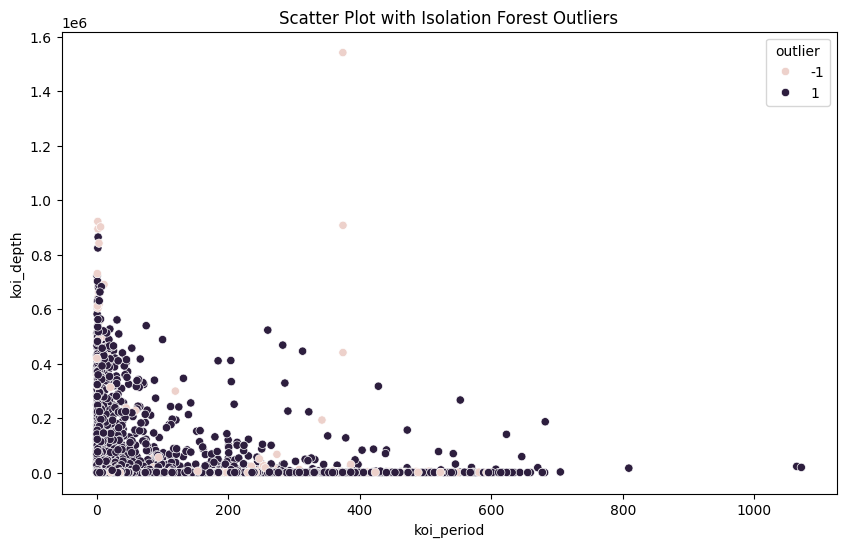

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with Isolation Forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='koi_period', y='koi_depth', hue='outlier', data=combined_df)
plt.title('Scatter Plot with Isolation Forest Outliers')
plt.show()


#**INITIAL VISUALISATION OF DATA**

we use PCA to convert our 45 dimension data to 3 dimension data

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = imputed_df.columns.tolist()

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[numeric_cols])

# Applying PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Creating a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
df_pca['koi_disposition'] = combined_df['koi_disposition']

# 3D Scatter Plot using Plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='koi_disposition',
    title='3D PCA Plot of KOI Data',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'}
)

fig.show()


#**OUTLIER REMOVAL**

we are using Z SCORE method to remove outliers

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Calculate Z-scores for imputed_df
z_scores = np.abs(stats.zscore(imputed_df))

# Setting a threshold for Z-scores
threshold = 3

# Identifying rows to keep (those without outliers)
rows_to_keep = (z_scores < threshold).all(axis=1)

# If the number of rows to remove is less than 600, decrease the threshold
# If the number of rows to remove is more than 800, increase the threshold
num_rows_to_remove = (~rows_to_keep).sum()

while num_rows_to_remove < 600 or num_rows_to_remove > 800:
    if num_rows_to_remove < 600:
        threshold -= 0.1
    else:
        threshold += 0.1
    rows_to_keep = (z_scores < threshold).all(axis=1)
    num_rows_to_remove = (~rows_to_keep).sum()

# Applying the filter to combined_df
cleaned_df = combined_df[rows_to_keep]

# Checking the number of rows removed
rows_removed = combined_df.shape[0] - cleaned_df.shape[0]

print(f"Rows removed: {rows_removed}")
print(f"Shape of the cleaned dataframe: {cleaned_df.shape}")

Rows removed: 777
Shape of the cleaned dataframe: (6539, 47)


we have removed in total 777 cols which are identified as outliers

#**CLEANED DATAFRAME**

In [ ]:
cleaned_df

,koi_pdisposition,koi_disposition,kepoi_name,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier,dbscan_label
0,CANDIDATE,CONFIRMED,K00752.01,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
1,CANDIDATE,CONFIRMED,K00752.02,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
2,FALSE POSITIVE,FALSE POSITIVE,K00753.01,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,-1
3,FALSE POSITIVE,FALSE POSITIVE,K00754.01,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1,-1
4,CANDIDATE,CONFIRMED,K00755.01,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,FALSE POSITIVE,FALSE POSITIVE,K07984.01,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,1,-1
7312,FALSE POSITIVE,FALSE POSITIVE,K07985.01,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,1,-1
7313,FALSE POSITIVE,FALSE POSITIVE,K07987.01,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,1,-1
7314,FALSE POSITIVE,FALSE POSITIVE,K07989.01,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,1,-1


#**REMOVING UNNECESSARY COLS**

kepoi_name is of no use drop it

In [ ]:
cleaned_df=cleaned_df.drop(['kepoi_name'], axis =1)
cleaned_df


,koi_pdisposition,koi_disposition,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier,dbscan_label
0,CANDIDATE,CONFIRMED,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
1,CANDIDATE,CONFIRMED,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
2,FALSE POSITIVE,FALSE POSITIVE,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,-1
3,FALSE POSITIVE,FALSE POSITIVE,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1,-1
4,CANDIDATE,CONFIRMED,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,FALSE POSITIVE,FALSE POSITIVE,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,1,-1
7312,FALSE POSITIVE,FALSE POSITIVE,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,1,-1
7313,FALSE POSITIVE,FALSE POSITIVE,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,1,-1
7314,FALSE POSITIVE,FALSE POSITIVE,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,1,-1


koi_fpflag_nt is of no use so drop it

In [ ]:
cleaned_df.drop(['koi_fpflag_nt'],axis=1)

,koi_pdisposition,koi_disposition,kepid,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier,dbscan_label
0,CANDIDATE,CONFIRMED,10797460.0,1.000,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
1,CANDIDATE,CONFIRMED,10797460.0,0.969,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
2,FALSE POSITIVE,FALSE POSITIVE,10811496.0,0.000,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,-1
3,FALSE POSITIVE,FALSE POSITIVE,10848459.0,0.000,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1,-1
4,CANDIDATE,CONFIRMED,10854555.0,1.000,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,FALSE POSITIVE,FALSE POSITIVE,8258160.0,0.000,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,1,-1
7312,FALSE POSITIVE,FALSE POSITIVE,10031643.0,0.000,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,1,-1
7313,FALSE POSITIVE,FALSE POSITIVE,10090151.0,0.000,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,1,-1
7314,FALSE POSITIVE,FALSE POSITIVE,10147276.0,0.021,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,1,-1


In [ ]:
cleaned_df['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    4299
CONFIRMED         2239
Name: count, dtype: int64

In [ ]:
cleaned_df['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    4341
CANDIDATE         2197
Name: count, dtype: int64

#**LABEL ENCODING**


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
custom_mapping = {'CANDIDATE': 1, 'FALSE POSITIVE': 0}
cleaned_df['koi_pdisposition'] = cleaned_df['koi_pdisposition'].map(custom_mapping).fillna(cleaned_df['koi_pdisposition'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
custom_mapping = {'CONFIRMED': 1, 'FALSE POSITIVE': 0}
cleaned_df['koi_disposition'] = cleaned_df['koi_disposition'].map(custom_mapping).fillna(cleaned_df['koi_pdisposition'])

In [ ]:
cleaned_df

,koi_pdisposition,koi_disposition,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,outlier,dbscan_label
0,1.0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
1,1.0,1.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,-1
2,0.0,0.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,-1
3,0.0,0.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1,-1
4,1.0,1.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,0.0,0.0,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,1,-1
7312,0.0,0.0,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,1,-1
7313,0.0,0.0,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,1,-1
7314,0.0,0.0,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,1,-1


In [ ]:
cleaned_df=cleaned_df.drop(['dbscan_label','outlier'],axis=1)
cleaned_df

,koi_pdisposition,koi_disposition,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.0,1.0,10797460.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1.0,1.0,10797460.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.0,0.0,10811496.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.0,0.0,10848459.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.0,1.0,10854555.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,0.0,0.0,8258160.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,-0.16000,8433.0,117.0,-117.0,21.71,3.50,-2.56,560.0,23.17,12.65,-7.53,78.4,1.0,5305.0,185.0,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
7312,0.0,0.0,10031643.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,176.40,152.77,-77.60,8.4,1.0,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
7313,0.0,0.0,10090151.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
7314,0.0,0.0,10147276.0,0.021,0.0,0.0,1.0,0.0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


#**USING FILTERING METHODS FOR SELECTING FEATURES**

In [ ]:
import pandas as pd
import numpy as np

# Calculating the correlation matrix
correlation_matrix = cleaned_df.corr()

# the correlation of each column with the target column
correlation_with_target = correlation_matrix['koi_disposition']

# Sorting the correlations with the target column
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)

# Selecting columns with high correlation
high_correlation_cols = sorted_correlations[sorted_correlations > 0.18].index.tolist()

# Remove the target column from the list
if 'koi_disposition' in high_correlation_cols:
    high_correlation_cols.remove('koi_disposition')

# Creating a new DataFrame with only the high correlation columns and the target column
selected_df = cleaned_df[high_correlation_cols]
selected_df






,koi_pdisposition,koi_score,koi_steff_err1,koi_steff_err2,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_nt,koi_slogg_err2,koi_fpflag_ec,koi_srad_err1,koi_teq,koi_tce_plnt_num,koi_duration_err2,koi_duration_err1,koi_depth,koi_impact,koi_time0bk_err1,koi_time0bk_err2,koi_steff,koi_model_snr,koi_period_err2,koi_period_err1
0,1.0,1.000,81.0,-81.0,0.0,0.0,0.0,-0.096,0.0,0.105,793.0,1.0,-0.08190,0.08190,615.8,0.146,0.002160,-0.002160,5455.0,35.8,-2.775000e-05,2.775000e-05
1,1.0,0.969,81.0,-81.0,0.0,0.0,0.0,-0.096,0.0,0.105,443.0,2.0,-0.11600,0.11600,874.8,0.586,0.003520,-0.003520,5455.0,25.8,-2.479000e-04,2.479000e-04
2,0.0,0.000,158.0,-176.0,1.0,0.0,0.0,-0.176,0.0,0.233,638.0,1.0,-0.03410,0.03410,10829.0,0.969,0.000581,-0.000581,5853.0,76.3,-1.494000e-05,1.494000e-05
3,0.0,0.000,157.0,-174.0,1.0,0.0,0.0,-0.168,0.0,0.201,1395.0,1.0,-0.00537,0.00537,8079.2,1.276,0.000115,-0.000115,5805.0,505.6,-2.630000e-07,2.630000e-07
4,1.0,1.000,169.0,-211.0,0.0,0.0,0.0,-0.210,0.0,0.334,1406.0,1.0,-0.04200,0.04200,603.3,0.701,0.001130,-0.001130,6031.0,40.9,-3.761000e-06,3.761000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,0.0,0.000,185.0,-185.0,1.0,0.0,0.0,-0.121,0.0,0.138,560.0,1.0,-0.16000,0.16000,8433.0,1.096,0.010900,-0.010900,5305.0,78.4,-2.264000e-04,2.264000e-04
7312,0.0,0.000,169.0,-152.0,0.0,0.0,0.0,-0.189,1.0,0.313,929.0,1.0,-0.63400,0.63400,87.7,0.765,0.015700,-0.015700,5638.0,8.4,-1.846000e-04,1.846000e-04
7313,0.0,0.000,139.0,-166.0,1.0,1.0,0.0,-0.196,0.0,0.237,2088.0,1.0,-0.01740,0.01740,1579.2,1.252,0.000170,-0.000170,5638.0,453.3,-1.160000e-07,1.160000e-07
7314,0.0,0.021,193.0,-236.0,0.0,1.0,0.0,-0.224,0.0,0.341,2218.0,1.0,-0.16200,0.16200,103.6,0.147,0.002850,-0.002850,6173.0,12.3,-2.434000e-06,2.434000e-06


#**USING WRAPPER METHOD FOR FEATURE SELECTION**

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6539 entries, 0 to 7315
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   6538 non-null   float64
 1   koi_disposition    6538 non-null   float64
 2   kepid              6539 non-null   float64
 3   koi_score          6539 non-null   float64
 4   koi_fpflag_nt      6539 non-null   float64
 5   koi_fpflag_ss      6539 non-null   float64
 6   koi_fpflag_co      6539 non-null   float64
 7   koi_fpflag_ec      6539 non-null   float64
 8   koi_period         6539 non-null   float64
 9   koi_period_err1    6539 non-null   float64
 10  koi_period_err2    6539 non-null   float64
 11  koi_time0bk        6539 non-null   float64
 12  koi_time0bk_err1   6539 non-null   float64
 13  koi_time0bk_err2   6539 non-null   float64
 14  koi_impact         6539 non-null   float64
 15  koi_impact_err1    6539 non-null   float64
 16  koi_impact_err2    6539 non-n

we can see that both koi_pdisposition and koi_disposition have one missing value

In [ ]:
null_index = cleaned_df[cleaned_df['koi_disposition'].isnull()].index
null_index

Index([7315], dtype='int64')

In [ ]:
cleaned_df[cleaned_df['koi_disposition'].isnull()]

,koi_pdisposition,koi_disposition,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7315,NaN,NaN,10156110.0,0.0,0.0,0.0,1.0,1.0,4.856035,0.000064,-0.000064,135.9933,0.0108,-0.0108,0.134,0.323,-0.134,3.078,0.283,-0.283,76.7,10.8,-10.8,1.05,0.36,-0.12,1266.0,607.42,600.39,-194.33,8.2,1.0,6469.0,158.0,-225.0,4.385,0.054,-0.216,1.193,0.41,-0.137,297.00977,47.121021,14.826


In [ ]:
null_index = cleaned_df[cleaned_df['koi_pdisposition'].isnull()].index
null_index

Index([7315], dtype='int64')

therefore we drop 7315

In [ ]:
cleaned_df=cleaned_df.drop(7315)

now we re index the df

In [ ]:
cleaned_df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = cleaned_df.drop(columns=['koi_disposition'])
y = cleaned_df['koi_disposition']

# Initializing the model
model = RandomForestClassifier()

# Initializing RFE with the model and the number of features to select
rfe = RFE(model, n_features_to_select=25)  # Adjusting the number of features as needed

# Fitting the RFE model
fit = rfe.fit(X, y)

# the selected features
selected_features_rfe = X.columns[fit.support_]
X_rfe = X[selected_features_rfe]

In [ ]:
X_rfe

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_duration_err1,koi_duration_err2,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_slogg_err2,koi_srad_err1
0,1.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.08190,-0.08190,-19.5,2.26,0.26,-0.15,93.59,29.45,-16.65,35.8,81.0,-81.0,-0.096,0.105
1,1.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.11600,-0.11600,-35.5,2.83,0.32,-0.19,9.11,2.87,-1.62,25.8,81.0,-81.0,-0.096,0.105
2,0.0,0.000,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,0.000581,-0.000581,0.03410,-0.03410,-171.0,14.60,3.92,-1.31,39.30,31.04,-10.49,76.3,158.0,-176.0,-0.176,0.233
3,0.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,0.000115,-0.000115,0.00537,-0.00537,-12.8,33.46,8.50,-2.83,891.96,668.95,-230.35,505.6,157.0,-174.0,-0.168,0.201
4,1.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.04200,-0.04200,-16.9,2.75,0.88,-0.35,926.16,874.33,-314.24,40.9,169.0,-211.0,-0.210,0.334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,0.0,0.000,1.0,0.0,0.0,0.0,164.950399,2.941000e-03,-2.941000e-03,0.013900,-0.013900,0.77500,-0.77500,-584.0,11.23,1.19,-1.08,0.95,0.40,-0.27,65.7,191.0,-174.0,-0.048,0.070
6534,0.0,0.000,0.0,1.0,0.0,0.0,23.627035,2.264000e-04,-2.264000e-04,0.010900,-0.010900,0.16000,-0.16000,-117.0,21.71,3.50,-2.56,23.17,12.65,-7.53,78.4,185.0,-185.0,-0.121,0.138
6535,0.0,0.000,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,0.015700,-0.015700,0.63400,-0.63400,-13.0,1.11,0.32,-0.23,176.40,152.77,-77.60,8.4,169.0,-152.0,-0.189,0.313
6536,0.0,0.000,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,0.000170,-0.000170,0.01740,-0.01740,-4.6,29.35,7.70,-2.57,4500.53,3406.38,-1175.26,453.3,139.0,-166.0,-0.196,0.237


#**USING EMBEDDED METHODS FOR FEATURE SELECTION**

In [ ]:
# model = RandomForestClassifier()
# model.fit(X, y)

# # Get feature importances
# importance = model.feature_importances_
# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# # Select top 20 features
# top_features_embedded = feature_importance.sort_values(by='Importance', ascending=False).head(22)['Feature']
# X_embedded = X[top_features_embedded]
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


X = cleaned_df.drop(columns=['koi_disposition'])
y = cleaned_df['koi_disposition']

# Initializing the model
model = RandomForestClassifier()

# Fitting the model
model.fit(X, y)

# feature importances
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Selecting top 20 features
top_features_embedded = feature_importance.sort_values(by='Importance', ascending=False).head(20)['Feature']
X_embedded = X[top_features_embedded]



In [ ]:
X_embedded

,koi_pdisposition,koi_score,koi_steff_err2,koi_fpflag_co,koi_fpflag_ss,koi_steff_err1,koi_fpflag_nt,koi_prad,koi_prad_err1,koi_duration_err2,koi_prad_err2,koi_insol_err1,koi_duration_err1,koi_slogg_err2,koi_insol,koi_srad_err1,koi_depth_err2,koi_fpflag_ec,koi_time0bk_err1,koi_model_snr
0,1.0,1.000,-81.0,0.0,0.0,81.0,0.0,2.26,0.26,-0.08190,-0.15,29.45,0.08190,-0.096,93.59,0.105,-19.5,0.0,0.002160,35.8
1,1.0,0.969,-81.0,0.0,0.0,81.0,0.0,2.83,0.32,-0.11600,-0.19,2.87,0.11600,-0.096,9.11,0.105,-35.5,0.0,0.003520,25.8
2,0.0,0.000,-176.0,0.0,1.0,158.0,0.0,14.60,3.92,-0.03410,-1.31,31.04,0.03410,-0.176,39.30,0.233,-171.0,0.0,0.000581,76.3
3,0.0,0.000,-174.0,0.0,1.0,157.0,0.0,33.46,8.50,-0.00537,-2.83,668.95,0.00537,-0.168,891.96,0.201,-12.8,0.0,0.000115,505.6
4,1.0,1.000,-211.0,0.0,0.0,169.0,0.0,2.75,0.88,-0.04200,-0.35,874.33,0.04200,-0.210,926.16,0.334,-16.9,0.0,0.001130,40.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,0.0,0.000,-174.0,0.0,0.0,191.0,1.0,11.23,1.19,-0.77500,-1.08,0.40,0.77500,-0.048,0.95,0.070,-584.0,0.0,0.013900,65.7
6534,0.0,0.000,-185.0,0.0,1.0,185.0,0.0,21.71,3.50,-0.16000,-2.56,12.65,0.16000,-0.121,23.17,0.138,-117.0,0.0,0.010900,78.4
6535,0.0,0.000,-152.0,0.0,0.0,169.0,0.0,1.11,0.32,-0.63400,-0.23,152.77,0.63400,-0.189,176.40,0.313,-13.0,1.0,0.015700,8.4
6536,0.0,0.000,-166.0,1.0,1.0,139.0,0.0,29.35,7.70,-0.01740,-2.57,3406.38,0.01740,-0.196,4500.53,0.237,-4.6,0.0,0.000170,453.3


#**MODEL TRAINING**

removing the same index in selected df and re indexing it

In [ ]:
selected_df=selected_df.drop(7315)
selected_df.reset_index(drop=True, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = selected_df
y = cleaned_df['koi_disposition']

# Splitting  the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Dictionary to store the evaluation results
results = {}

# Training and evaluate each model
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# the evaluation results
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print()


Logistic Regression Results:
  Accuracy: 0.9918
  Precision: 0.9937
  Recall: 0.9886
  F1 Score: 0.9911

Naive Bayes Results:
  Accuracy: 0.9913
  Precision: 0.9933
  Recall: 0.9879
  F1 Score: 0.9905

Random Forest Results:
  Accuracy: 0.9913
  Precision: 0.9933
  Recall: 0.9879
  F1 Score: 0.9905

Support Vector Machine Results:
  Accuracy: 0.9908
  Precision: 0.9930
  Recall: 0.9872
  F1 Score: 0.9900



#**VISUALISATION OF LOGISTIC REGRESSION**

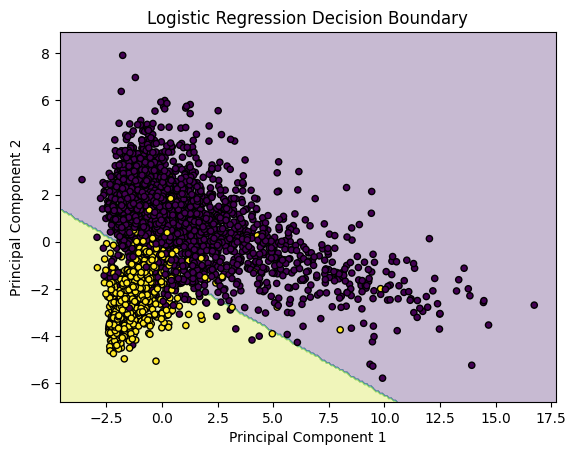

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reducing the data to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Training logistic regression model on the 2D data
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_pca, y_train)

# Defining a mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting on mesh grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting a decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#**VISUALISATION OF RANDOM FOREST CLASSIFIER**

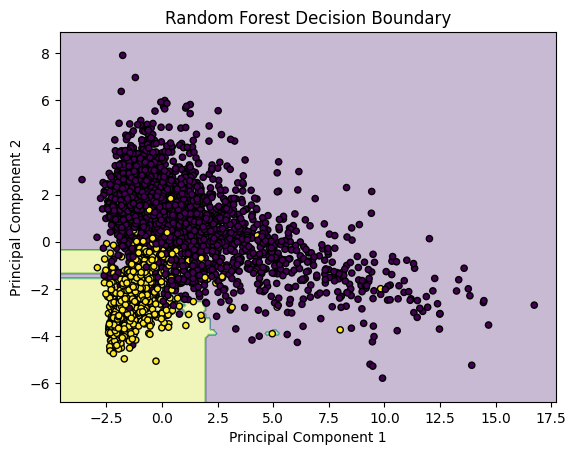

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training a random forest model on the 2D data
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_pca, y_train)

# Predictting on mesh grid
Z_rf = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

# Plotting a decision boundary
plt.contourf(xx, yy, Z_rf, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Random Forest Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#**FEATURE IMPORTANCE OF RANDOM FOREST CLASSIFIER**

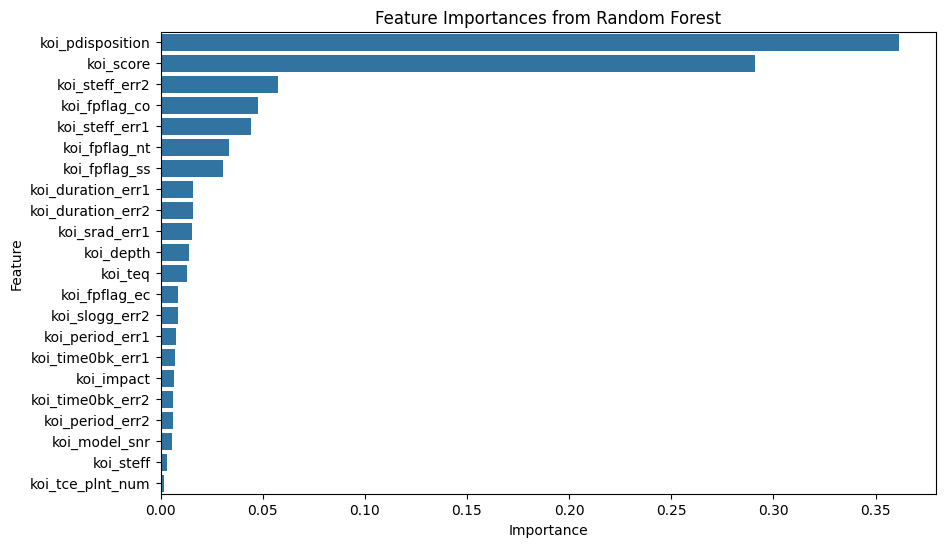

In [ ]:
# Training a random forest model on the original data
rf_clf_full = RandomForestClassifier()
rf_clf_full.fit(X_train_scaled, y_train)

# feature importances
feature_importances = rf_clf_full.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest')
plt.show()


#**VISUALISATION OF SUPPORT VECTOR MACHINES**

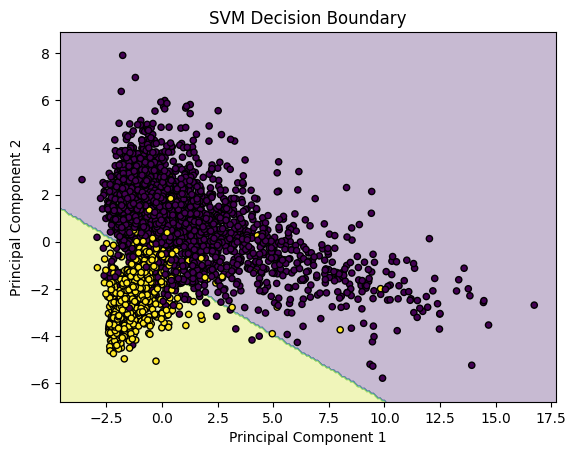

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# Training SVM model on the 2D data
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_pca, y_train)

# Defining a mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting on mesh grid
Z_svm = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Plotting decision boundary
plt.contourf(xx, yy, Z_svm, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#**NAIVE BAYES DECISION BOUNDARY**

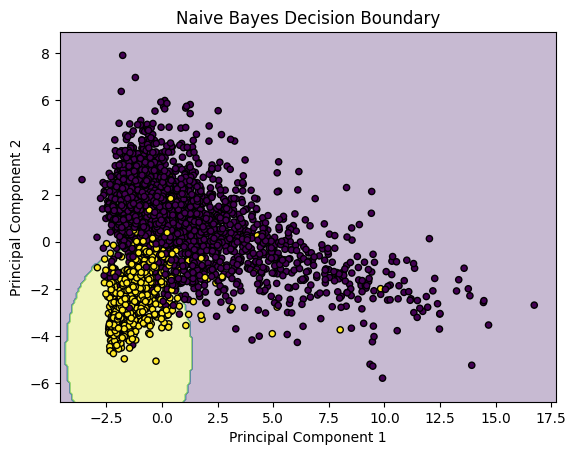

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Training Naive Bayes model on the 2D data
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train)

# Predicting on mesh grid
Z_nb = nb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_nb = Z_nb.reshape(xx.shape)

# Ploting decision boundary
plt.contourf(xx, yy, Z_nb, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Naive Bayes Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#**PLOTTING CONFUSION MATRIX**

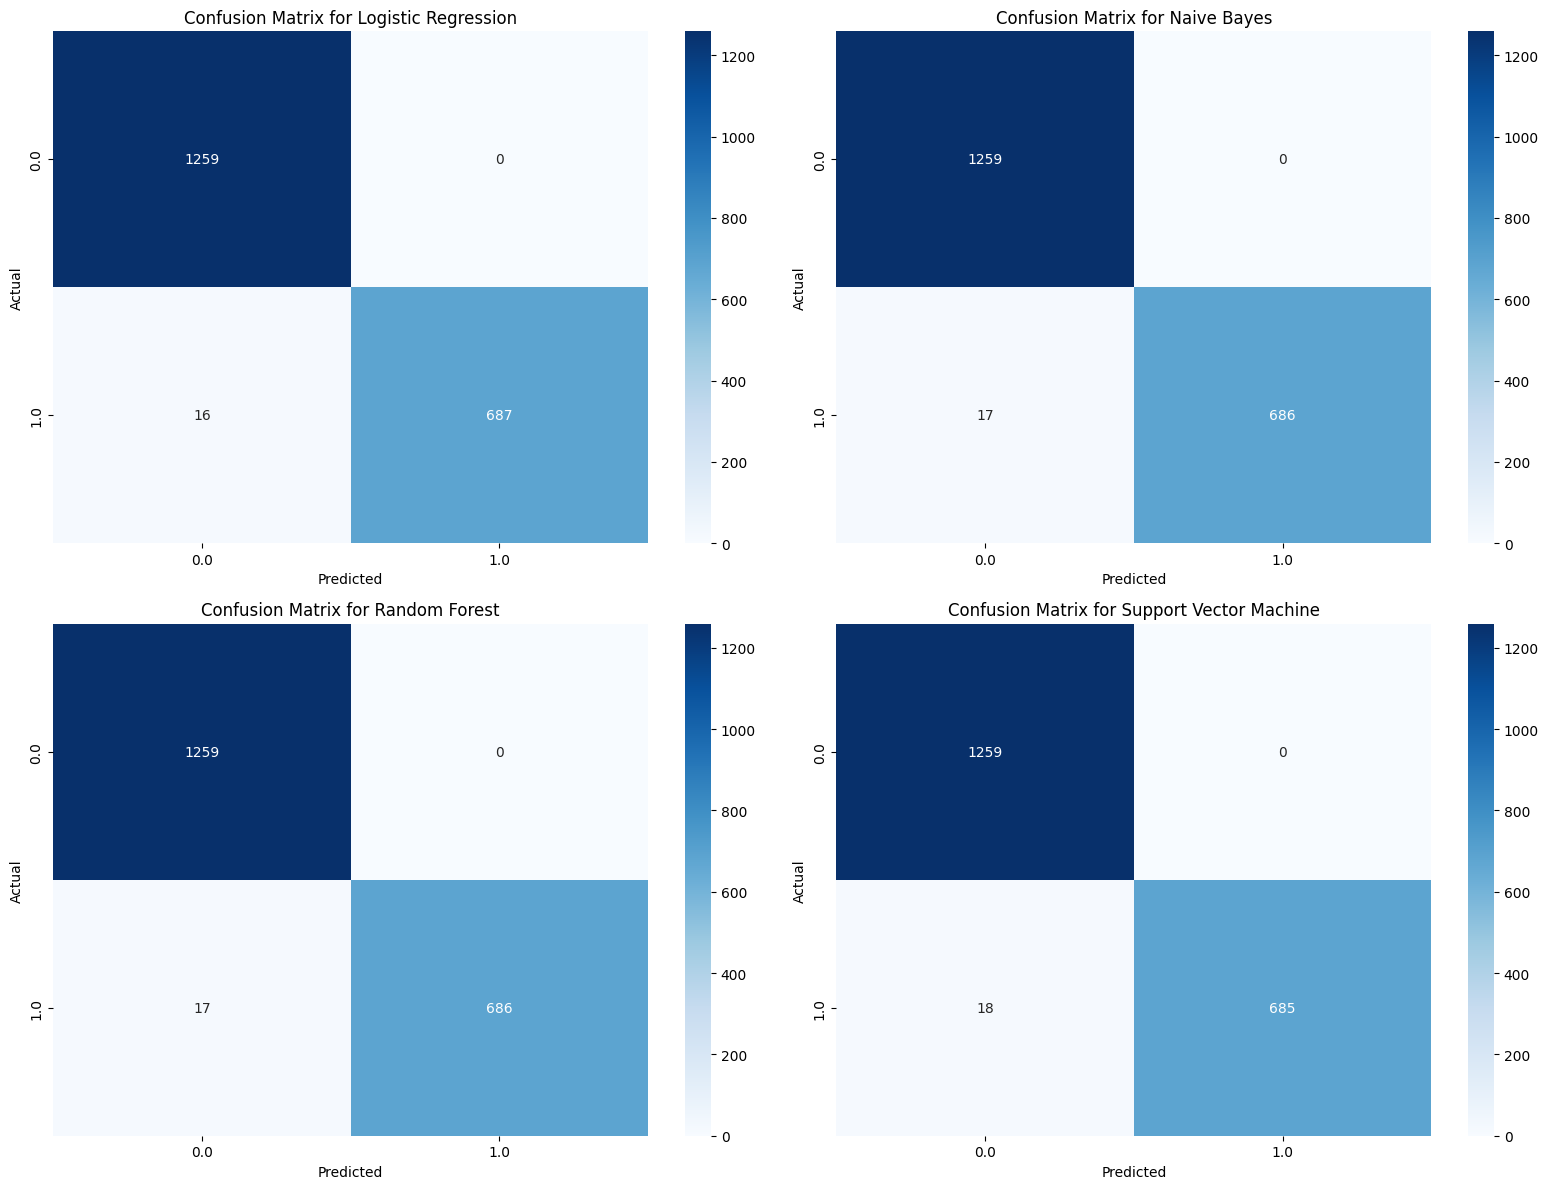

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = selected_df
y = cleaned_df['koi_disposition']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Function to evaluate the model and return the confusion matrix
def evaluate_and_get_confusion_matrix(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Computing confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return cm, accuracy, precision, recall, f1

# Dictionary to store the evaluation results
results = {}
confusion_matrices = {}

# Training, evaluatation, and storing confusion matrix for each model
for model_name, model in models.items():
    cm, accuracy, precision, recall, f1 = evaluate_and_get_confusion_matrix(model, X_train_scaled, X_test_scaled, y_train, y_test)
    confusion_matrices[model_name] = cm
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Plotting confusion matrices in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for ax, (model_name, cm) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=models['Logistic Regression'].classes_, yticklabels=models['Logistic Regression'].classes_)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
